In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data_excel/20250301.xlsx', header=2)

df = df[:25] # delete footnotes
df.drop(columns=['№ п/п', 'Январь 2008*'], inplace=True)
df.drop(index=0, inplace=True)

In [3]:
# Melt the dataframe to long format
df_long = pd.melt(
    df,
    id_vars=["Показатель"],
    var_name="ds",
    value_name="y"
)

# Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### Fund volume in RUB

03:01:28 - cmdstanpy - INFO - Chain [1] start processing
03:01:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


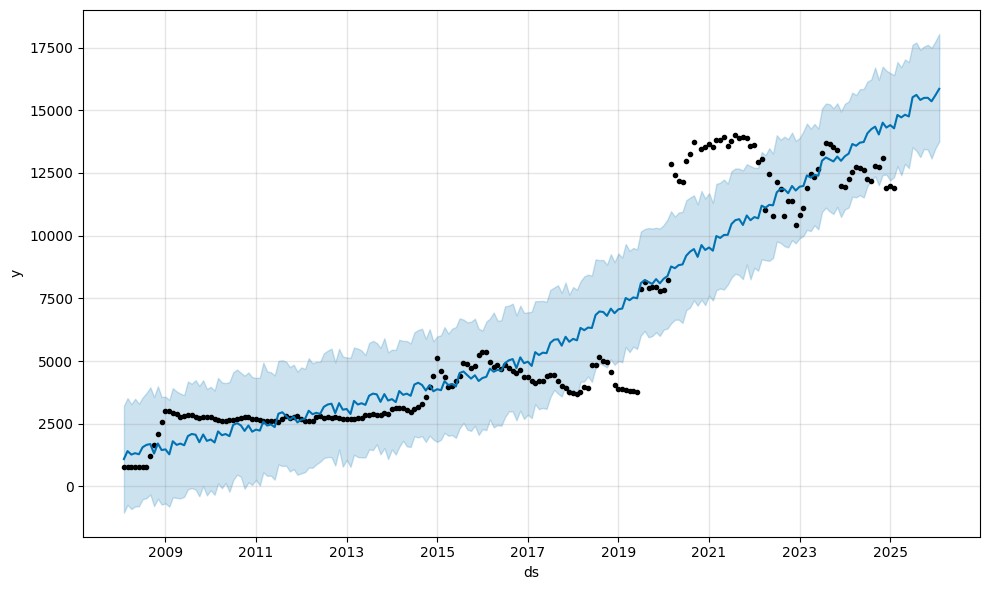

In [4]:
# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем на конец периода"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

# Initialize and fit the model
model = Prophet(growth= 'linear')
model.fit(prophet_data)

# Create future dates
future = model.make_future_dataframe(periods=12, freq="M")  # Forecast 12 months

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [5]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
205,2025-02-28,14813.149275,12776.607189,16921.127361
206,2025-03-31,14716.078186,12410.242325,16717.181138
207,2025-04-30,14821.536833,12866.995095,17027.022975
208,2025-05-31,14752.700908,12691.567780,16918.655929
209,2025-06-30,15518.679399,13526.087009,17617.655893
210,2025-07-31,15612.242677,13381.210170,17701.414203
211,2025-08-31,15412.110506,13133.388562,17405.237760
212,2025-09-30,15492.541078,13462.991430,17544.677483
213,2025-10-31,15497.158319,13428.161578,17608.946083
214,2025-11-30,15356.915808,13077.734148,17489.717688


### Fund volume in USD

03:01:50 - cmdstanpy - INFO - Chain [1] start processing
03:01:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\lenovo\python\virtual_environments\rnwf-env\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


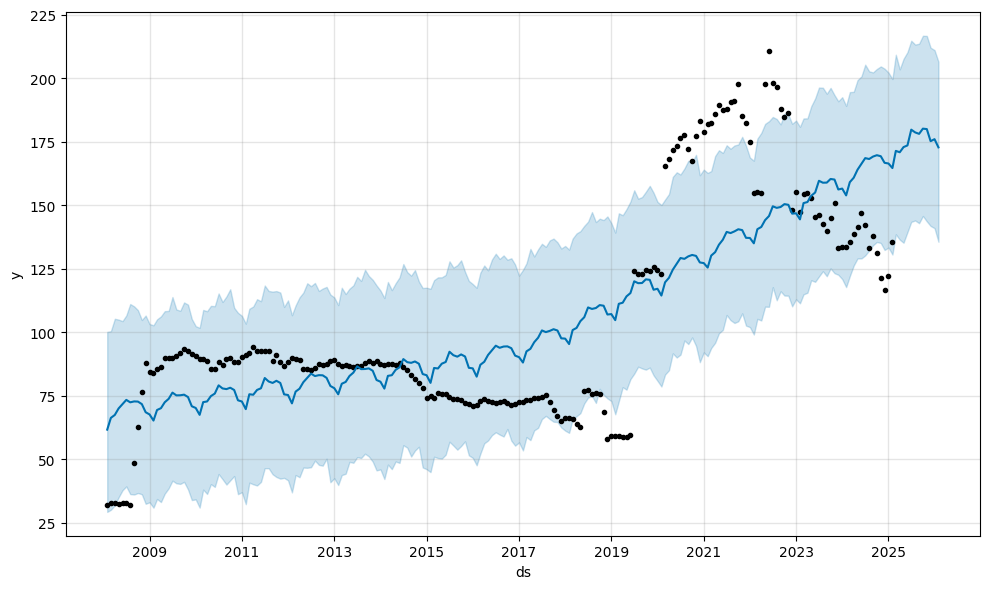

In [6]:
# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем средств фонда на конец периода (млрд. долларов США)"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

# Initialize and fit the model
model = Prophet()
model.fit(prophet_data)

# Create future dates
future = model.make_future_dataframe(periods=12, freq="M")  # Forecast 12 months

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [7]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
205,2025-02-28,171.454306,138.609949,209.308273
206,2025-03-31,170.916541,136.514049,203.546464
207,2025-04-30,172.949174,135.309231,207.678169
208,2025-05-31,173.602758,139.490842,210.322796
209,2025-06-30,179.807311,143.513143,214.814112
210,2025-07-31,178.722776,144.063703,213.303311
211,2025-08-31,178.159467,142.998819,213.630335
212,2025-09-30,180.207218,145.834115,216.763144
213,2025-10-31,180.038142,143.704056,216.712436
214,2025-11-30,175.282505,141.907030,212.077980


## Logistic regression

03:01:57 - cmdstanpy - INFO - Chain [1] start processing
03:01:57 - cmdstanpy - INFO - Chain [1] done processing
03:01:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:01:57 - cmdstanpy - INFO - Chain [1] start processing
03:01:58 - cmdstanpy - INFO - Chain [1] done processing


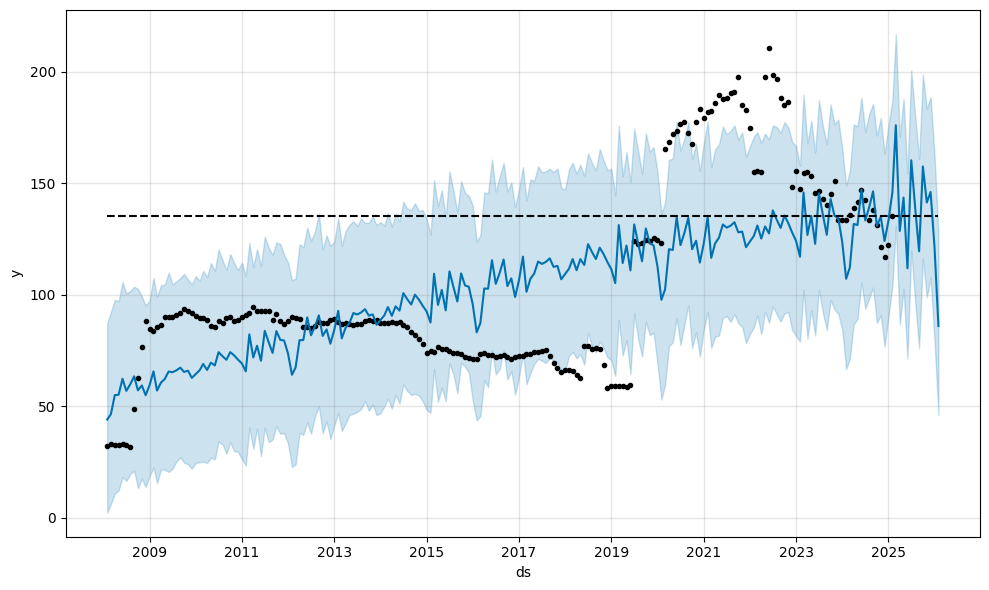

In [8]:
# Convert "ds" to datetime
df_long["ds"] = pd.to_datetime(df_long["ds"])

# Filter for a specific indicator (e.g., "Поступления")
prophet_data = df_long[df_long["Показатель"] == "Объем средств фонда на конец периода (млрд. долларов США)"][["ds", "y"]]

# Drop rows with missing values (if needed)
prophet_data = prophet_data.dropna()

# Clean the 'y' column and convert it to numeric type
prophet_data = prophet_data.map(lambda x: str(x).replace(' ', '').replace(',', '.').replace('***', '') if isinstance(x, str) else x)
prophet_data['y'] = prophet_data['y'].apply(pd.to_numeric, errors='coerce')

# Cap
prophet_data['cap'] = prophet_data['y'][-1:].item()

# Initialize and fit the model
model = Prophet(growth= 'logistic',
                seasonality_mode='multiplicative',
                changepoints=['2024-01-01'], 
                changepoint_range=0.9, 
                changepoint_prior_scale = 0.15,)
model.fit(prophet_data)

# Create future dates
future = model.make_future_dataframe(periods=12, freq="ME")  # Forecast 12 months
future['cap'] = prophet_data['y'][-1:].item()

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
205,2025-02-28,175.944999,130.816485,216.858032
206,2025-03-31,128.565781,86.586735,170.833979
207,2025-04-30,143.524554,102.588788,187.647381
208,2025-05-31,111.817027,71.278299,154.141517
209,2025-06-30,160.241300,119.668362,200.615881
210,2025-07-31,138.991868,97.044741,180.193051
211,2025-08-31,119.431931,76.022260,160.748938
212,2025-09-30,157.465495,116.223749,198.630055
213,2025-10-31,141.290208,98.776045,183.316627
214,2025-11-30,146.008031,107.653803,188.623476


* `n_changepoints`, `changepoint_range`, `changepoint_prior_scale`


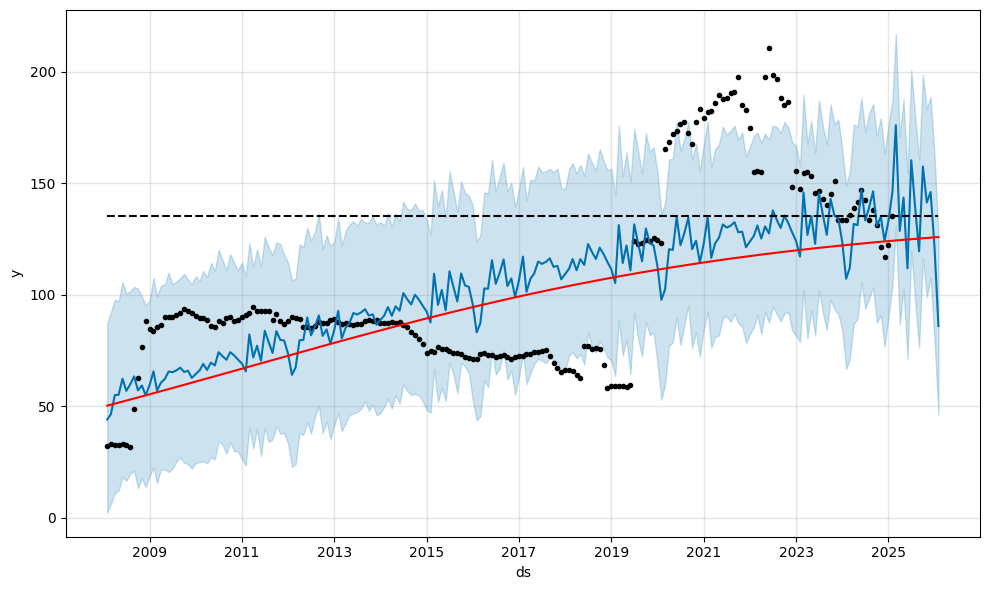

In [10]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [11]:
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_data)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)


03:02:10 - cmdstanpy - INFO - Chain [1] start processing
03:02:10 - cmdstanpy - INFO - Chain [1] done processing
03:02:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:02:10 - cmdstanpy - INFO - Chain [1] start processing
03:02:10 - cmdstanpy - INFO - Chain [1] done processing
03:02:26 - cmdstanpy - INFO - Chain [1] start processing
03:02:26 - cmdstanpy - INFO - Chain [1] done processing
03:02:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:02:26 - cmdstanpy - INFO - Chain [1] start processing
03:02:26 - cmdstanpy - INFO - Chain [1] done processing
03:02:38 - cmdstanpy - INFO - Chain [1] start processing
03:02:38 - cmdstanpy - INFO - Chain [1] done processing
03:02:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  38.834734
1                     0.001                     0.10  39.111343
2                     0.001                     1.00  39.059049
3                     0.001                    10.00  39.039244
4                     0.010                     0.01  37.965040
5                     0.010                     0.10  38.488759
6                     0.010                     1.00  38.844226
7                     0.010                    10.00  38.441861
8                     0.100                     0.01  38.153132
9                     0.100                     0.10  38.130813
10                    0.100                     1.00  38.394275
11                    0.100                    10.00  38.533116
12                    0.500                     0.01  32.205397
13                    0.500                     0.10  32.584579
14                    0.500             